In [1]:
%config InteractiveShell.ast_node_interactivity="last_expr_or_assign"

In [2]:
import uproot3 as uproot
import hist
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt

In [3]:
##Opens files and assigns values to trees and branches, to be pulled from later
#Signal = uproot.open("/data/users/jupyter-blonsbro/SUSY/VBFSUSY_13_Higgsino_250_mjj_all.root")['allev/hftree']

Signal = uproot.open("/data/users/jupyter-blonsbro/SUSY/VBFSUSY_13_Higgsino_250_mmjj_1000_-1_1004s_5000n/analysis/histograms.root")['allev/hftree']
Sbranches = Signal.arrays()
BackgroundEWQ = uproot.open("/data/users/mhance/SUSY/VjjEWK_13_mjj_all.root")['allev/hftree']
BEWQbranches = BackgroundEWQ.arrays()
BackgroundQCD = uproot.open("/data/users/mhance/SUSY/VjjQCD_13_mjj_all.root")['allev/hftree']
BQCDbranches = BackgroundQCD.arrays()
##Mask from Len, to be applied to all values, includes more than just mjj
Smask = (Sbranches[b"mjj"] > 1000)&(Sbranches[b"MET"] > 200)&(Sbranches[b"njet"] >= 2)&(Sbranches[b"nElec"] == 0)&(Sbranches[b"nMuon"] == 0)
BEWQmask = (BEWQbranches[b"mjj"] > 1000)&(BEWQbranches[b"MET"] > 200)&(BEWQbranches[b"njet"] >= 2)&(BEWQbranches[b"nElec"] == 0)&(BEWQbranches[b"nMuon"] == 0)
BQCDmask = (BQCDbranches[b"mjj"] > 1000)&(BQCDbranches[b"MET"] > 200)&(BQCDbranches[b"njet"] >= 2)&(BQCDbranches[b"nElec"] == 0)&(BQCDbranches[b"nMuon"] == 0)

array([False, False, False, ..., False, False, False])

In [4]:
##Assign arrays to all values, signal and backgrounds. apply mask to constrain values
#MET
S_MET = Sbranches[b"MET"][Smask] 
B_MET = np.append(BEWQbranches[b"MET"][BEWQmask],BQCDbranches[b"MET"][BQCDmask])
#mjj
S_mjj = Sbranches[b"mjj"][Smask] 
BEWQ_mjj = BEWQbranches[b"mjj"][BEWQmask]
BQCD_mjj = BQCDbranches[b"mjj"][BQCDmask]
B_mjj = np.append(BEWQ_mjj,BQCD_mjj)
#j1PT
S_j1PT = Sbranches[b"j1PT"][Smask] 
BEWQ_j1PT = BEWQbranches[b"j1PT"][BEWQmask]
BQCD_j1PT = BQCDbranches[b"j1PT"][BQCDmask]
B_j1PT = np.append(BEWQ_j1PT,BQCD_j1PT)
#j1Eta
S_j1Eta = Sbranches[b"j1Eta"][Smask] 
BEWQ_j1Eta = BEWQbranches[b"j1Eta"][BEWQmask]
BQCD_j1Eta = BQCDbranches[b"j1Eta"][BQCDmask]
B_j1Eta = np.append(BEWQ_j1Eta,BQCD_j1Eta)
#j1Phi
S_j1Phi = Sbranches[b"j1Phi"][Smask] 
BEWQ_j1Phi = BEWQbranches[b"j1Phi"][BEWQmask]
BQCD_j1Phi = BQCDbranches[b"j1Phi"][BQCDmask]
B_j1Phi = np.append(BEWQ_j1Phi,BQCD_j1Phi)
#j2PT
S_j2PT = Sbranches[b"j2PT"][Smask] 
BEWQ_j2PT = BEWQbranches[b"j2PT"][BEWQmask]
BQCD_j2PT = BQCDbranches[b"j2PT"][BQCDmask]
B_j2PT = np.append(BEWQ_j2PT,BQCD_j2PT)
#j2Eta
S_j2Eta = Sbranches[b"j2Eta"][Smask] 
BEWQ_j2Eta = BEWQbranches[b"j2Eta"][BEWQmask]
BQCD_j2Eta = BQCDbranches[b"j2Eta"][BQCDmask]
B_j2Eta = np.append(BEWQ_j2Eta,BQCD_j2Eta)
#j2Phi
S_j2Phi = Sbranches[b"j2Phi"][Smask] 
BEWQ_j2Phi = BEWQbranches[b"j2Phi"][BEWQmask]
BQCD_j2Phi = BQCDbranches[b"j2Phi"][BQCDmask]
B_j2Phi = np.append(BEWQ_j2Phi,BQCD_j2Phi)
#Etachange
S_Etachange = np.subtract(S_j1Eta, S_j2Eta) 
BEWQ_Etachange = np.subtract(BEWQ_j1Eta, BEWQ_j2Eta) 
BQCD_Etachange = np.subtract(BQCD_j1Eta, BQCD_j2Eta)
B_Etachange = np.append(BEWQ_Etachange,BQCD_Etachange)
#weight
S_weight = Sbranches[b"weight"][Smask] 
BEWQ_weight = BEWQbranches[b"weight"][BEWQmask]
BQCD_weight = BQCDbranches[b"weight"][BQCDmask]
B_weight = np.append(BEWQ_weight,BQCD_weight)

array([2.9868002e-06, 2.9868002e-06, 2.9868002e-06, ..., 7.5751436e-06,
       7.5751436e-06, 7.5751436e-06], dtype=float32)

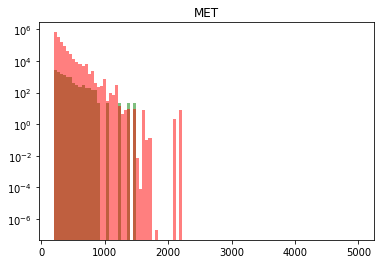

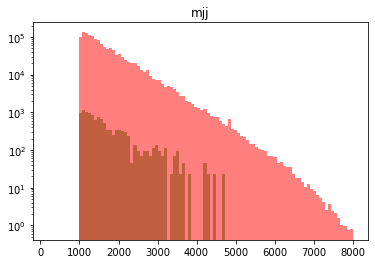

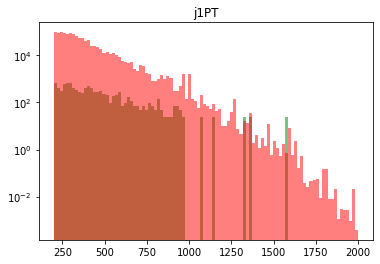

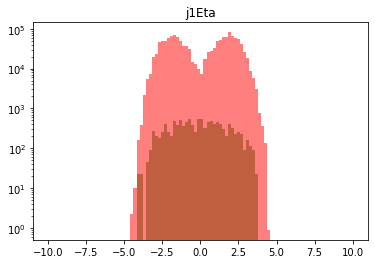

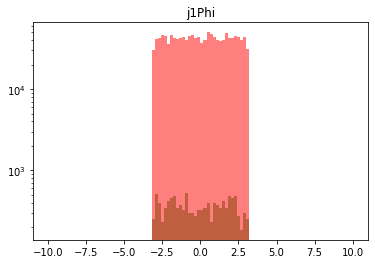

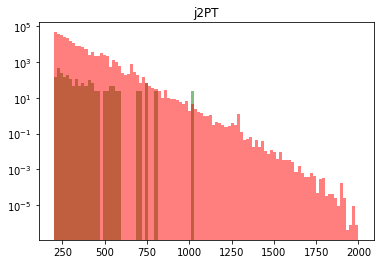

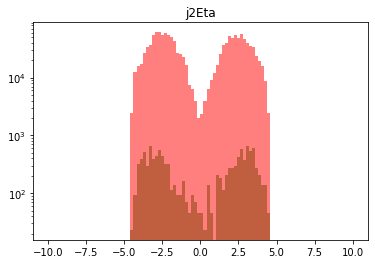

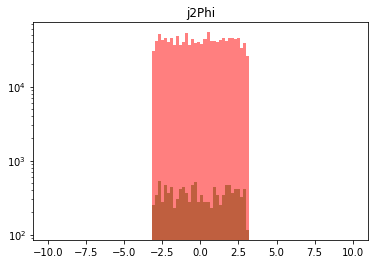

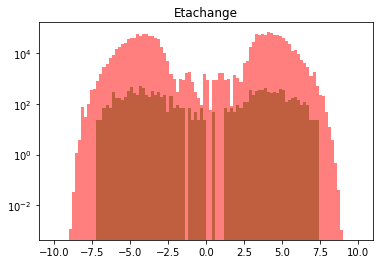

In [5]:
##Plot Graphs
#MET
plt.hist(S_MET,bins=100,range=(200,5000),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_MET,bins=100,range=(200,5000),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("MET")
plt.show()
#mjj
plt.hist(S_mjj,bins=100,range=(200,8000),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_mjj,bins=100,range=(200,8000),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("mjj")
plt.show()
#j1PT
plt.hist(S_j1PT,bins=100,range=(200,2000),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_j1PT,bins=100,range=(200,2000),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("j1PT")
plt.show()
#j1Eta
plt.hist(S_j1Eta,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_j1Eta,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("j1Eta")
plt.show()
#j1Phi
plt.hist(S_j1Phi,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_j1Phi,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("j1Phi")
plt.show()
#j2PT
plt.hist(S_j2PT,bins=100,range=(200,2000),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_j2PT,bins=100,range=(200,2000),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("j2PT")
plt.show()
#j2Eta
plt.hist(S_j2Eta,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_j2Eta,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("j2Eta")
plt.show()
#j2Phi
plt.hist(S_j2Phi,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_j2Phi,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("j2Phi")
plt.show()
#Etachange
plt.hist(S_Etachange,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='g')
plt.hist(B_Etachange,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='r')
plt.yscale('log')
plt.title("Etachange")
plt.show()

In [6]:
'''# write the histogram to the output file.
###MET comparison Canvas
c1 = ROOT.TCanvas( 'c1', 'MET SvB') 

METBackgroundsum = b_MET1+b_MET2 #you can add histograms like this
METBackgroundsum.SetLineColor(ROOT.kOrange) #set histogram colors
h_MET.SetLineColor(ROOT.kBlue)
b_MET1.SetLineColor(ROOT.kRed)
b_MET2.SetLineColor(ROOT.kGreen)

METBackgroundsum.SetAxisRange(1,10**7,"Y")
h_MET.SetAxisRange(1,10**7,"Y")
b_MET1.SetAxisRange(1,10**7,"Y")
b_MET2.SetAxisRange(1,10**7,"Y")

METBackgroundsum.Draw("SAME C") #Draw command adds to canvas, "SAME" does not overwrite the canvas
h_MET.Draw("SAME C")
b_MET1.Draw("SAME")
b_MET2.Draw("SAME")

c1.SetLogy(ROOT.kTRUE) #sets graph to logarithmic scale

L1 = ROOT.TLegend(0.65,0.65,0.9,0.9) #creates legend, numbers are fractions of screen.
L1.AddEntry(h_MET,"h_MET","l") #add entry to legend, first entry is histogram to match to, 2nd is title, 3rd is specification, in this case l=line
L1.AddEntry(METBackgroundsum,"Backgroundsum(MET)","l")
L1.AddEntry(b_MET1,"METbackground1","l")
L1.AddEntry(b_MET2,"METbackground2","l")
L1.Draw("SAME") 

c1.SetTitle("MET BvS")

c1.Update() #update command refreshes and sets the current changes
c1.Write() #write command saves to root file

###jPT comparison Canvas
c2 = ROOT.TCanvas( 'c2', 'jPT SvB')

jPTBackgroundsum = b_jPT1+b_jPT2
jPTBackgroundsum.SetLineColor(ROOT.kOrange)
h_jPT.SetLineColor(ROOT.kBlue)
b_jPT1.SetLineColor(ROOT.kRed)
b_jPT2.SetLineColor(ROOT.kGreen)

jPTBackgroundsum.SetAxisRange(1,1500,"X")
h_jPT.SetAxisRange(1,1500,"X")
b_jPT1.SetAxisRange(1,1500,"X")
b_jPT2.SetAxisRange(1,1500,"X")

jPTBackgroundsum.SetAxisRange(1,10**7,"Y")
h_jPT.SetAxisRange(1,10**7,"Y")
b_jPT1.SetAxisRange(1,10**7,"Y")
b_jPT2.SetAxisRange(1,10**7,"Y")

jPTBackgroundsum.Draw("SAME C")
h_jPT.Draw("SAME C")
b_jPT1.Draw("SAME")
b_jPT2.Draw("SAME")

c2.SetLogy(ROOT.kTRUE)

L2 = ROOT.TLegend(0.65,0.65,0.9,0.9)
L2.AddEntry(h_jPT,"h_jPT","l")
L2.AddEntry(jPTBackgroundsum,"Backgroundsum(jPT)","l")
L2.AddEntry(b_jPT1,"jPTbackground1","l")
L2.AddEntry(b_jPT2,"jPTbackground2","l")
L2.Draw("SAME")

c2.Update()
c2.Write()

#TLorentz Vector graphs
##Mdi Comparison Canvas
c3 = ROOT.TCanvas( 'c3', 'M SvB')

MdiBackgroundsum = b_Mdi1+b_Mdi2
MdiBackgroundsum.SetLineColor(ROOT.kOrange)
h_Mdi.SetLineColor(ROOT.kBlue)
b_Mdi1.SetLineColor(ROOT.kRed)
b_Mdi2.SetLineColor(ROOT.kGreen)

MdiBackgroundsum.SetAxisRange(1,15000,"X")

MdiBackgroundsum.Draw("SAME C")
h_Mdi.Draw("SAME C")
b_Mdi1.Draw("SAME")
b_Mdi2.Draw("SAME")

c3.SetLogy(ROOT.kTRUE)

L3 = ROOT.TLegend(0.65,0.65,0.9,0.9)
L3.AddEntry(h_Mdi,"Mdi","l")
L3.AddEntry(MdiBackgroundsum,"Backgroundsum(Mdi)","l")
L3.AddEntry(b_Mdi1,"Mdibackground1","l")
L3.AddEntry(b_Mdi2,"Mdibackground2","l")
L3.Draw("SAME")

c3.Update()
c3.Write()
##Eta Comparison Canvas
c4 = ROOT.TCanvas( 'c4', 'Eta SvB')

EtadiBackgroundsum = b_Etadi1+b_Etadi2
EtadiBackgroundsum.SetLineColor(ROOT.kOrange)
h_Etadi.SetLineColor(ROOT.kBlue)
b_Etadi1.SetLineColor(ROOT.kRed)
b_Etadi2.SetLineColor(ROOT.kGreen)



EtadiBackgroundsum.Draw("SAME C")
h_Etadi.Draw("SAME C")
b_Etadi1.Draw("SAME")
b_Etadi2.Draw("SAME")

c4.SetLogy(ROOT.kTRUE)

L4 = ROOT.TLegend(0.65,0.65,0.9,0.9)
L4.AddEntry(h_Etadi,"Etadi","l")
L4.AddEntry(EtadiBackgroundsum,"Backgroundsum(Etadi)","l")
L4.AddEntry(b_Etadi1,"Etadibackground1","l")
L4.AddEntry(b_Etadi2,"Etadibackground2","l")
L4.Draw("SAME")

c4.Update()
c4.Write()
##PhiDi comparison canvas
c5 = ROOT.TCanvas( 'c5', 'Phidi SvB')

PhidiBackgroundsum = b_Phidi1+b_Phidi2
PhidiBackgroundsum.SetLineColor(ROOT.kOrange)
h_Phidi.SetLineColor(ROOT.kBlue)
b_Phidi1.SetLineColor(ROOT.kRed)
b_Phidi2.SetLineColor(ROOT.kGreen)

PhidiBackgroundsum.SetAxisRange(1,10**7,"Y")
h_Phidi.SetAxisRange(1,10**7,"Y")
b_Phidi1.SetAxisRange(1,10**7,"Y")
b_Phidi2.SetAxisRange(1,10**7,"Y")

PhidiBackgroundsum.Draw("SAME C")
h_Phidi.Draw("SAME C")
b_Phidi1.Draw("SAME")
b_Phidi2.Draw("SAME")

c5.SetLogy(ROOT.kTRUE)

L5 = ROOT.TLegend(0.65,0.65,0.9,0.9)
L5.AddEntry(h_Phidi,"Phidi","l")
L5.AddEntry(PhidiBackgroundsum,"Backgroundsum(Phi)","l")
L5.AddEntry(b_Phidi1,"Phibackground1","l")
L5.AddEntry(b_Phidi2,"Phibackground2","l")
L5.Draw("SAME")

c5.Update()
c5.Write()
##Ptdi Comparison Canvas
c6 = ROOT.TCanvas( 'c6', 'Ptdi SvB')

PtdiBackgroundsum = b_Ptdi1+b_Ptdi2
PtdiBackgroundsum.SetLineColor(ROOT.kOrange)
h_Ptdi.SetLineColor(ROOT.kBlue)
b_Ptdi1.SetLineColor(ROOT.kRed)
b_Ptdi2.SetLineColor(ROOT.kGreen)



PtdiBackgroundsum.Draw("SAME C")
h_Ptdi.Draw("SAME C")
b_Ptdi1.Draw("SAME")
b_Ptdi2.Draw("SAME")

PtdiBackgroundsum.SetAxisRange(1,10**7,"Y")
h_Ptdi.SetAxisRange(1,10**7,"Y")
b_Ptdi1.SetAxisRange(1,10**7,"Y")
b_Ptdi2.SetAxisRange(1,10**7,"Y")

c6.SetLogy(ROOT.kTRUE)

L6 = ROOT.TLegend(0.65,0.65,0.9,0.9)
L6.AddEntry(h_Ptdi,"Ptdi","l")
L6.AddEntry(PtdiBackgroundsum,"Backgroundsum(Ptdi)","l")
L6.AddEntry(b_Ptdi1,"Ptdibackground1","l")
L6.AddEntry(b_Ptdi2,"Ptdibackground2","l")
L6.Draw("SAME")

c6.Update()
c6.Write()'''

'# write the histogram to the output file.\n###MET comparison Canvas\nc1 = ROOT.TCanvas( \'c1\', \'MET SvB\') \n\nMETBackgroundsum = b_MET1+b_MET2 #you can add histograms like this\nMETBackgroundsum.SetLineColor(ROOT.kOrange) #set histogram colors\nh_MET.SetLineColor(ROOT.kBlue)\nb_MET1.SetLineColor(ROOT.kRed)\nb_MET2.SetLineColor(ROOT.kGreen)\n\nMETBackgroundsum.SetAxisRange(1,10**7,"Y")\nh_MET.SetAxisRange(1,10**7,"Y")\nb_MET1.SetAxisRange(1,10**7,"Y")\nb_MET2.SetAxisRange(1,10**7,"Y")\n\nMETBackgroundsum.Draw("SAME C") #Draw command adds to canvas, "SAME" does not overwrite the canvas\nh_MET.Draw("SAME C")\nb_MET1.Draw("SAME")\nb_MET2.Draw("SAME")\n\nc1.SetLogy(ROOT.kTRUE) #sets graph to logarithmic scale\n\nL1 = ROOT.TLegend(0.65,0.65,0.9,0.9) #creates legend, numbers are fractions of screen.\nL1.AddEntry(h_MET,"h_MET","l") #add entry to legend, first entry is histogram to match to, 2nd is title, 3rd is specification, in this case l=line\nL1.AddEntry(METBackgroundsum,"Backgroundsum